# Heart Attack Analysis and Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
col_dict = {
        'age':'Age',
        'sex':'Sex',
        'cp':'ChestPainType',
        'trtbps':'RestBloodPressure',
        'chol':'Cholesterol', 
        'fbs':'FastingBloodSugar',
        'restecg':'RestECG',
        'thalachh':'MaxHeartRate',
        'exng':'ExerciseAngina',
        'oldpeak':'STDepbyExercise',
        'slp':'Slop',
        'caa':'MajorVessels',
        'thall':'DefectType',
        'output':'output'
    }


In [9]:
df.rename(columns=col_dict,inplace=True)
df.head()

,Age,Sex,ChestPainType,RestBloodPressure,Cholesterol,FastingBloodSugar,RestECG,MaxHeartRate,ExerciseAngina,STDepbyExercise,Slop,MajorVessels,DefectType,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                303 non-null    int64  
 1   Sex                303 non-null    int64  
 2   ChestPainType      303 non-null    int64  
 3   RestBloodPressure  303 non-null    int64  
 4   Cholesterol        303 non-null    int64  
 5   FastingBloodSugar  303 non-null    int64  
 6   RestECG            303 non-null    int64  
 7   MaxHeartRate       303 non-null    int64  
 8   ExerciseAngina     303 non-null    int64  
 9   STDepbyExercise    303 non-null    float64
 10  Slop               303 non-null    int64  
 11  MajorVessels       303 non-null    int64  
 12  DefectType         303 non-null    int64  
 13  output             303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
df.isna().sum()     

Age                  0
Sex                  0
ChestPainType        0
RestBloodPressure    0
Cholesterol          0
FastingBloodSugar    0
RestECG              0
MaxHeartRate         0
ExerciseAngina       0
STDepbyExercise      0
Slop                 0
MajorVessels         0
DefectType           0
output               0
dtype: int64

No null values, dataset is complete. Let us begin with the analysis.

# Exploratory Data Analysis

male 207
Female 96


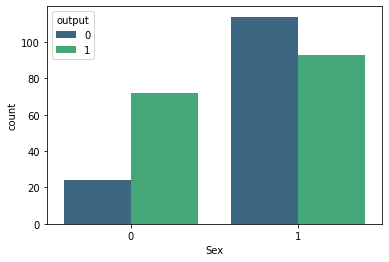

In [30]:
sns.countplot(x='Sex',data=df,palette='viridis',hue='output',)
print("male",df[(df['Sex']==1)]['Age'].count())
print("Female",df[(df['Sex']==0)]['Age'].count())

Mean Cholesterol: 246.0


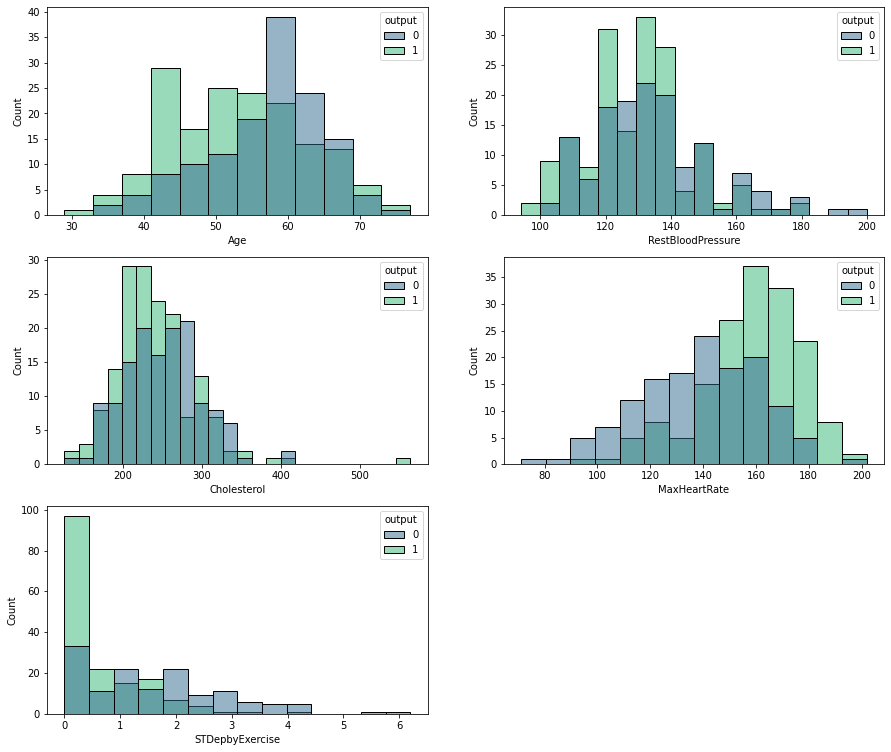

In [67]:
plt.figure(figsize=(15,13))

vals = ['Age','RestBloodPressure', 'Cholesterol','MaxHeartRate','STDepbyExercise']
c=1
for i in vals:
    plt.subplot(3,2,c)
    sns.histplot(data=df,x=i,hue='output',palette='viridis')
    c+=1
print("Mean Cholesterol:",np.round(np.mean(df['Cholesterol'])))

Here, we can see that heart rate greater than 140 is increasing the chances of a heart attack. The mean cholesterol levels are 240 and it gives a higher chance for a heart attack to occur.Also, it is shocking to know maximum probability of heart attacks is below the age of 60.

In [69]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestBloodPressure', 'Cholesterol',
       'FastingBloodSugar', 'RestECG', 'MaxHeartRate', 'ExerciseAngina',
       'STDepbyExercise', 'Slop', 'MajorVessels', 'DefectType', 'output'],
      dtype='object')

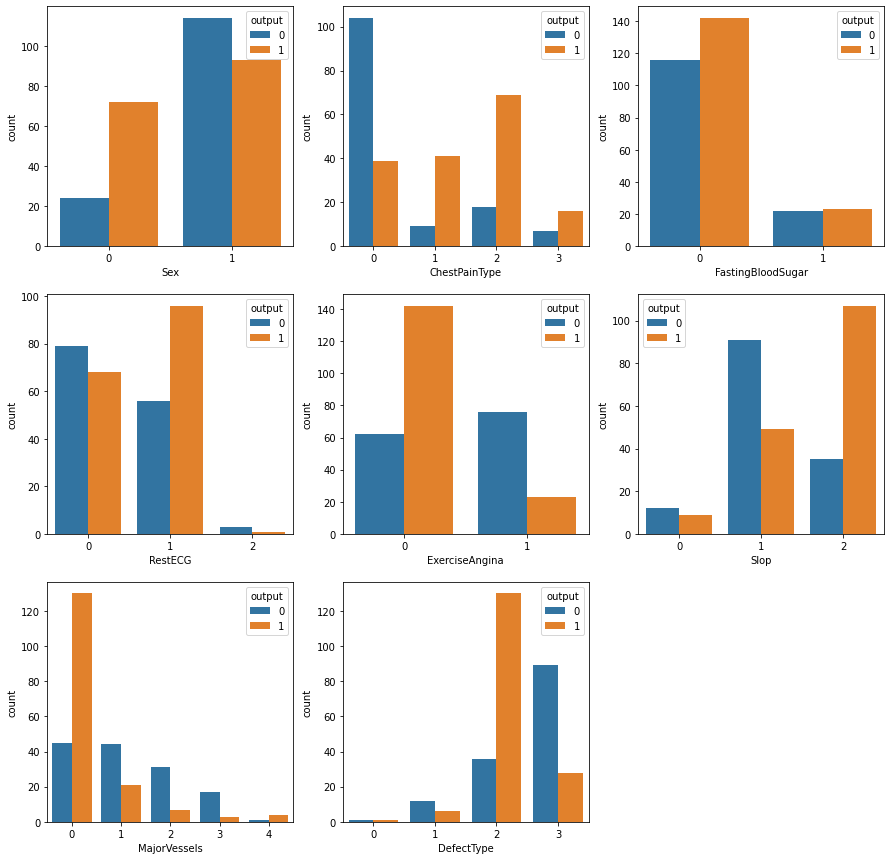

In [76]:
vals_cat = ['Sex', 'ChestPainType','FastingBloodSugar','RestECG','ExerciseAngina','Slop', 'MajorVessels', 'DefectType']
row,cols = 3,3
plt.figure(figsize=(15,15))
plt.tight_layout()
c=1

for i in vals_cat:
    plt.subplot(row,cols,c)
    sns.countplot(data=df,x=i,hue='output')
    c+=1

Here we can notice, with major vessels is inversly propotional to the chance of getting a heart attack. there is more chance of heart attack if the chest pain(angina) is not induced by exercise. If the fasting blood sugar is greater than 120 mg/dl, the chance of a heart attack increases.

<AxesSubplot:>

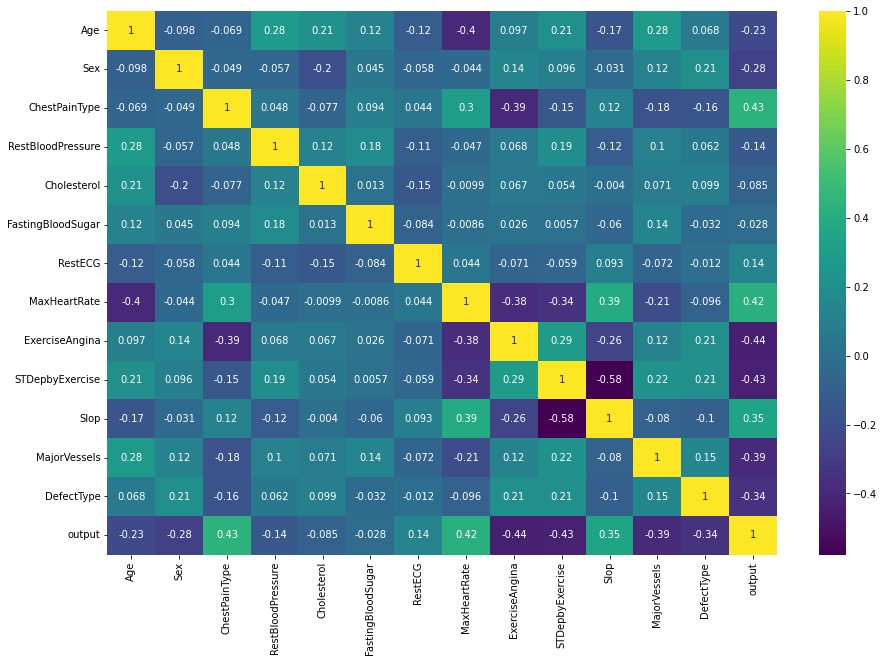

In [78]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

<AxesSubplot:xlabel='Age', ylabel='RestBloodPressure'>

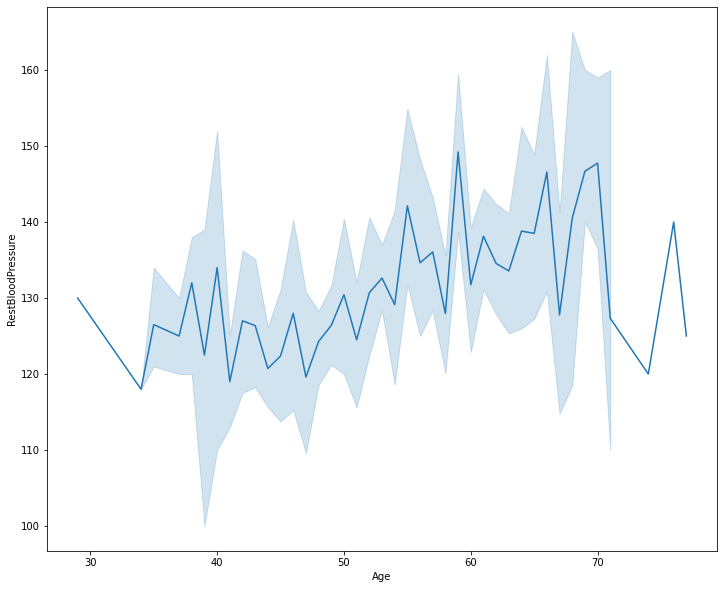

In [89]:
plt.figure(figsize=(12,10))
sns.lineplot(x='Age',y='RestBloodPressure',data=df)


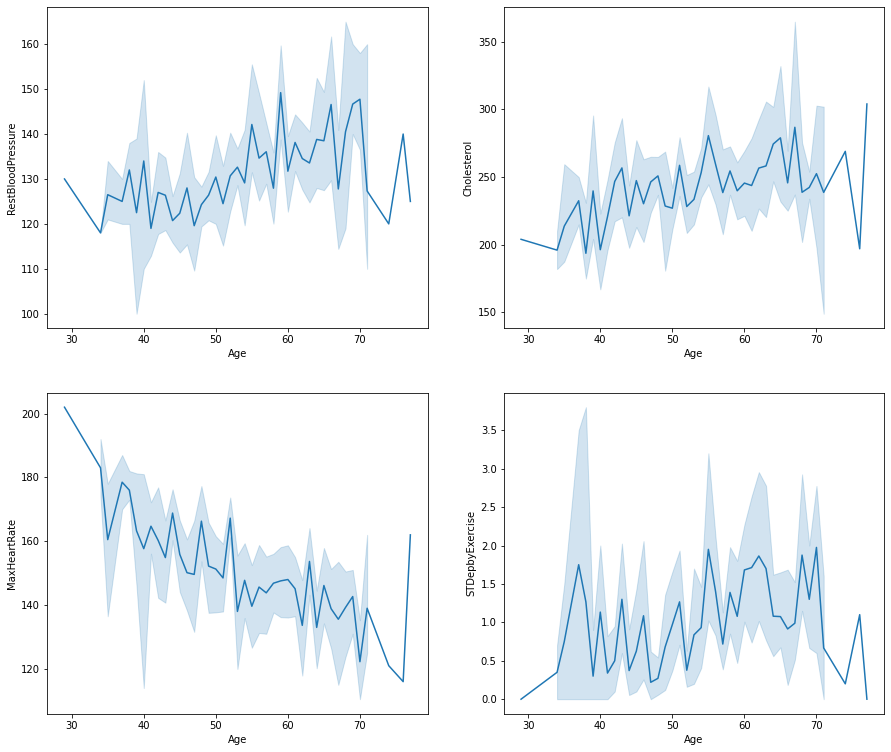

In [91]:
plt.figure(figsize=(15,13))

vals = ['RestBloodPressure', 'Cholesterol','MaxHeartRate','STDepbyExercise']
c=1
for i in vals:
    plt.subplot(2,2,c)
    sns.lineplot(data=df,x='Age',y=i,palette='viridis')
    c+=1

The trends in the dataset suggest that with increasing age, Max heart rate decreases significantly, whereas Rest blood pressure and cholesterol increases.

# Predictions (Logistic Regression)

In [98]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestBloodPressure', 'Cholesterol',
       'FastingBloodSugar', 'RestECG', 'MaxHeartRate', 'ExerciseAngina',
       'STDepbyExercise', 'Slop', 'MajorVessels', 'DefectType', 'output'],
      dtype='object')

In [99]:
df.head(2)

,Age,Sex,ChestPainType,RestBloodPressure,Cholesterol,FastingBloodSugar,RestECG,MaxHeartRate,ExerciseAngina,STDepbyExercise,Slop,MajorVessels,DefectType,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [108]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
Fbs = pd.get_dummies(df['FastingBloodSugar'],drop_first=True)
ecg = pd.get_dummies(df['RestECG'],drop_first=True)
ea = pd.get_dummies(df['ExerciseAngina'],drop_first=True)
sl = pd.get_dummies(df['Slop'],drop_first=True)
mv = pd.get_dummies(df['MajorVessels'],drop_first=True)
dt = pd.get_dummies(df['DefectType'],drop_first=True)

In [127]:
ea = ea.rename(columns={1:'ea(1)'})
sex=sex.rename(columns={1:'Male'})
Fbs=Fbs.rename(columns={1:'fbs(1)'})
ecg = ecg.rename(columns={1:"ecg(1)",2:"ecg(2)"})
sl = sl.rename(columns={1:"sl(1)",2:"sl(2)"})
mv = mv.rename(columns={1:"mv(1)",2:"mv(2)",3:"mv(3)",4:"mv(4)"})
dt = dt.rename(columns={1:"dt(1)",2:"dt(2)",3:"dt(3)"})

In [129]:
df_copy = df.copy(deep=True)

In [130]:
df_copy.head()

,Age,Sex,ChestPainType,RestBloodPressure,Cholesterol,FastingBloodSugar,RestECG,MaxHeartRate,ExerciseAngina,STDepbyExercise,Slop,MajorVessels,DefectType,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [132]:
df_copy=pd.concat([df_copy,ea,sex,Fbs,ecg,sl,mv,dt],axis=1)

In [133]:
df_copy.head()

,Age,Sex,ChestPainType,RestBloodPressure,Cholesterol,FastingBloodSugar,RestECG,MaxHeartRate,ExerciseAngina,STDepbyExercise,...,ecg(2),sl(1),sl(2),mv(1),mv(2),mv(3),mv(4),dt(1),dt(2),dt(3)
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,0,0,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,0,0,0,0,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,0,1,0,0,0,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,0,1,0,0,0,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,1,0,0,0,0,0,1,0


In [138]:
df_copy.drop(['Sex','ChestPainType','FastingBloodSugar','RestECG','ExerciseAngina','Slop','MajorVessels','DefectType'],axis=1,inplace=True)

In [139]:
df_copy.head()

,Age,RestBloodPressure,Cholesterol,MaxHeartRate,STDepbyExercise,output,ea(1),Male,fbs(1),ecg(1),ecg(2),sl(1),sl(2),mv(1),mv(2),mv(3),mv(4),dt(1),dt(2),dt(3)
0,63,145,233,150,2.3,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0


In [144]:
df_copy.columns
X = pd.DataFrame(df_copy[['Age', 'RestBloodPressure', 'Cholesterol', 'MaxHeartRate',
       'STDepbyExercise', 'ea(1)', 'Male', 'fbs(1)', 'ecg(1)',
       'ecg(2)', 'sl(1)', 'sl(2)', 'mv(1)', 'mv(2)', 'mv(3)', 'mv(4)', 'dt(1)',
       'dt(2)', 'dt(3)']])
y = pd.DataFrame(df['output'])

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [154]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)

In [155]:
lr.fit(X_train,y_train.values.ravel())

LogisticRegression(max_iter=10000)

In [156]:
pred = lr.predict(X_test)

In [208]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,pred),'\n\n',confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        44
           1       0.86      0.91      0.89        47

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91
 

 [[37  7]
 [ 4 43]]


# Predictions(KNN Classifier)

In [159]:
df_copy.head()

,Age,RestBloodPressure,Cholesterol,MaxHeartRate,STDepbyExercise,output,ea(1),Male,fbs(1),ecg(1),ecg(2),sl(1),sl(2),mv(1),mv(2),mv(3),mv(4),dt(1),dt(2),dt(3)
0,63,145,233,150,2.3,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0


In [160]:
from sklearn.preprocessing import StandardScaler

In [161]:
scaler = StandardScaler()
scaler.fit(df_copy[['Age','RestBloodPressure','Cholesterol', 'MaxHeartRate','STDepbyExercise']])

StandardScaler()

In [165]:
scaled= scaler.transform(df_copy[['Age','RestBloodPressure','Cholesterol', 'MaxHeartRate','STDepbyExercise']])

In [170]:
scaled_df=pd.DataFrame(scaled,columns=['Age', 'RestBloodPressure', 'Cholesterol', 'MaxHeartRate',
       'STDepbyExercise'])

In [174]:
df_copy.drop(['Age','RestBloodPressure','Cholesterol', 'MaxHeartRate','STDepbyExercise'],axis=1,inplace=True)

In [175]:
df_copy=pd.concat([df_copy,scaled_df],axis=1)

In [187]:
X = df_copy.iloc[:,1:]

In [191]:
y=df_copy['output']

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [199]:
from sklearn.neighbors import KNeighborsClassifier
error=[]
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(y_test!=pred_i))

Text(0, 0.5, 'error rate')

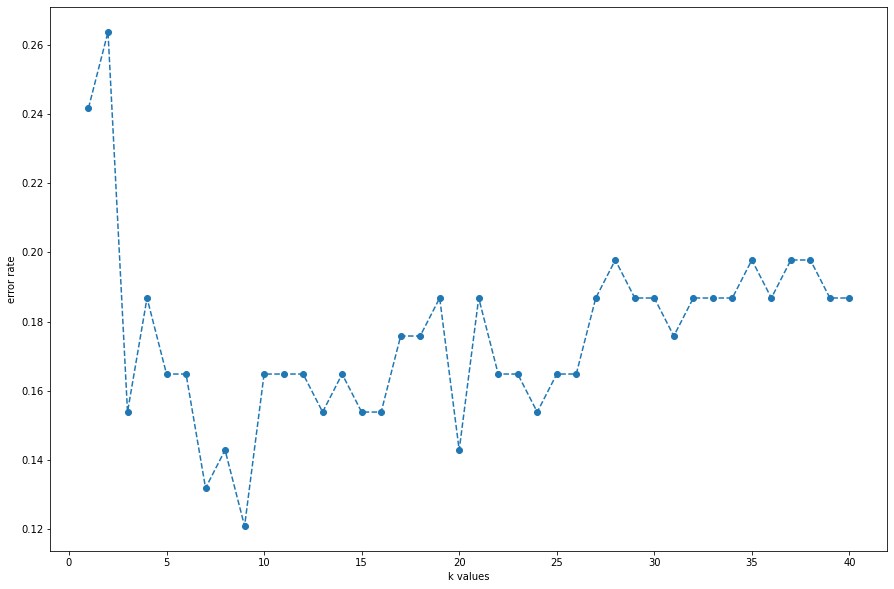

In [200]:
plt.figure(figsize=(15,10))
plt.plot(range(1,41),error,ls='dashed',marker='o')
plt.xlabel('k values')
plt.ylabel('error rate')

In [201]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [202]:
pred=knn.predict(X_test)

In [204]:
print(classification_report(y_test,pred),'\n\n',confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        44
           1       0.86      0.91      0.89        47

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91
 

 [[37  7]
 [ 4 43]]


In [209]:
print(accuracy_score(y_test,pred)*100)

87.91208791208791


## Thankyou